![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [4]:
# Read CSV
#house_csv = "../DATA/Sacramentorealestatetransactions.csv"
data = pd.read_csv("/Users/Vani/Documents/BlackCat/DSIA-SYD-FT-201907/Module 4/DATA 4/Sacramentorealestatetransactions.csv")

In [5]:
data.shape

(985, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [8]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [10]:
data['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

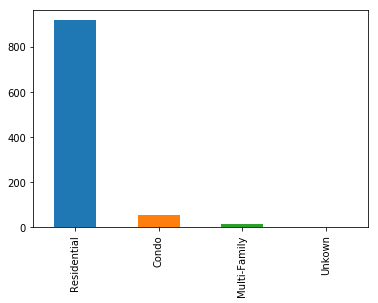

In [11]:
data['type'].value_counts().plot(kind='bar')

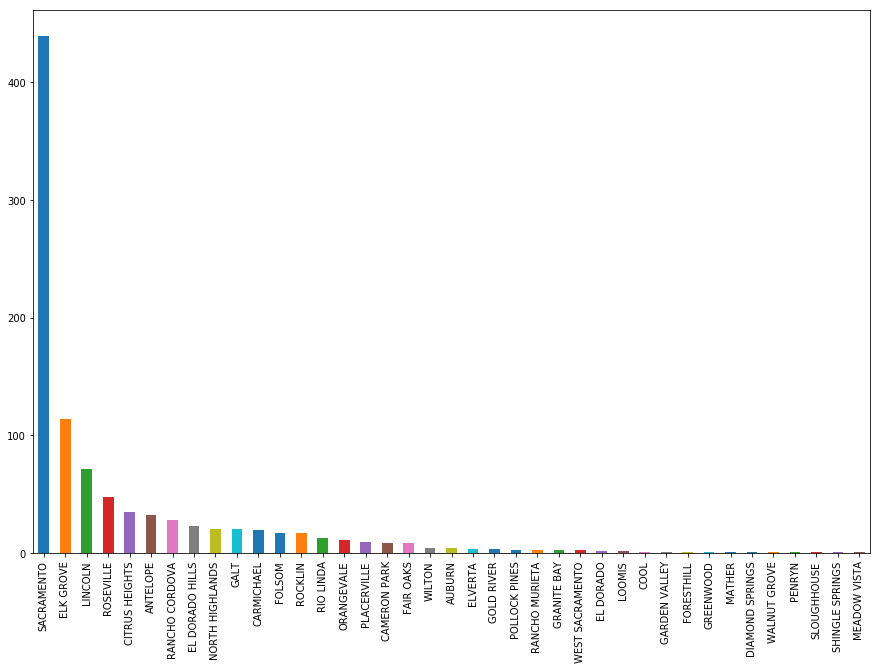

In [15]:
data['city'].value_counts().plot(kind='bar',figsize=(15,10))

In [27]:
data.loc[data['beds']==0]['type'].count()

108

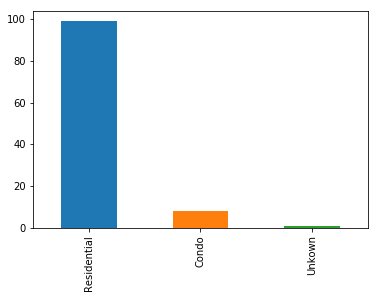

In [24]:
data.loc[data['beds']==0]['type'].value_counts().plot(kind='bar')

In [28]:
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

#### 2.2 List all possible variables which might be Predictor variable.

In [4]:
# ANSWER
## beds
## baths
## sqft
## Type

In [30]:
Y = data['price']

In [31]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [29]:
# ANSWER
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [32]:
# ANSWER
data['y_hat'] = data['price'].mean()

In [33]:
data.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'y_hat'],
      dtype='object')

In [34]:
X = data['sq__ft']
Y = data['price']
Yhat = data['y_hat']

In [37]:
import matplotlib.pyplot as plt
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

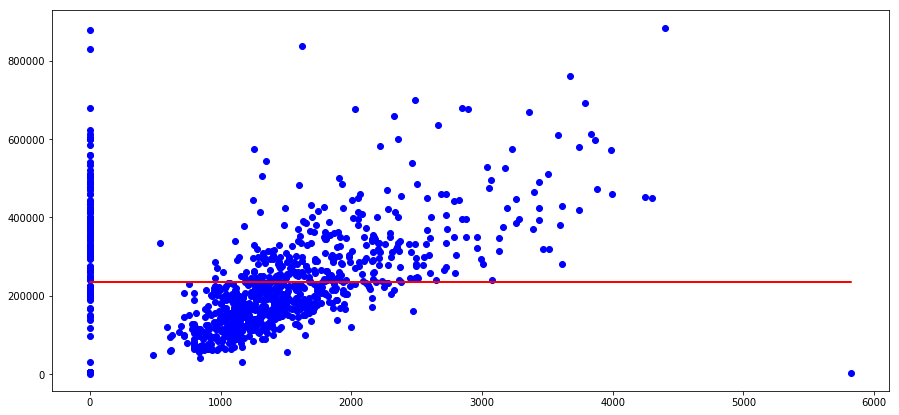

In [38]:
draw_plot(X, Y, Yhat)

#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [39]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891476

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [ ]:
X = data['sq__ft']
Y = data['price']

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [ ]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [ ]:
beta_1 = calculate_beta_1(X, Y)
beta_1

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [58]:
# ANSWER
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [59]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [45]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [46]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
5      223696.155138
6      222721.299623
7      226674.880320
8      213893.441354
9      224995.962490
10     212160.364884
11     232740.647966
12     210102.336576
13     218171.973889
14     218280.291169
15     224346.058814
16     208640.053304
17     205986.279959
18     194775.441544
19     236369.276825
20     223479.520579
21     234906.993553
22     230086.874621
23     249638.143548
24     211727.095766
25     221854.761388
26     215084.931427
27     223533.679218
28     237669.084177
29     230520.143738
           ...      
955    237181.656420
956    233877.979399
957    231278.364694
958    257166.194465
959    245088.817814
960    241460.188955
961    239618.795206
962    211023.033450
963    264856.721301
964    233444.710281
965    239727.112485
966    162930.161407
967    234365.407156
968    258790.953656
969    251046.268180
970    162930.161407
971    219255

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [47]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [48]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
5      133775.155138
6      131826.299623
7      135672.880320
8      118988.441354
9      126058.962490
10     111851.364884
11     126490.647966
12     103250.336576
13     110669.973889
14     109530.291169
15     113646.058814
16      95377.053304
17      89736.279959
18      74775.441544
19     114739.276825
20     101479.520579
21     112224.993553
22     107086.874621
23     125538.143548
24      86727.095766
25      95214.761388
26      87803.931427
27      94533.679218
28     106469.084177
29      98520.143738
           ...      
955     28931.656420
956     25559.979399
957     21931.364694
958     45666.194465
959     33088.817814
960     28460.188955
961     23618.795206
962      4997.966550
963     45856.721301
964     13650.710281
965     19727.112485
966     57069.838593
967     14365.407156
968     38790.953656
969     28046.268180
970     61069.838593
971      4744

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [49]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [50]:
def calculate_residula_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [51]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residula_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [52]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.5.G [BONUS] Draw Plot of Predicted Line

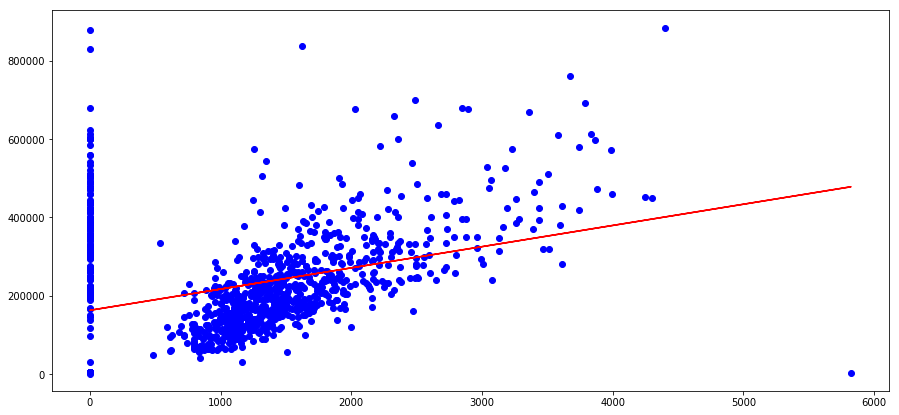

In [53]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [54]:
# ANSWER
data['Yhat'] = Yhat

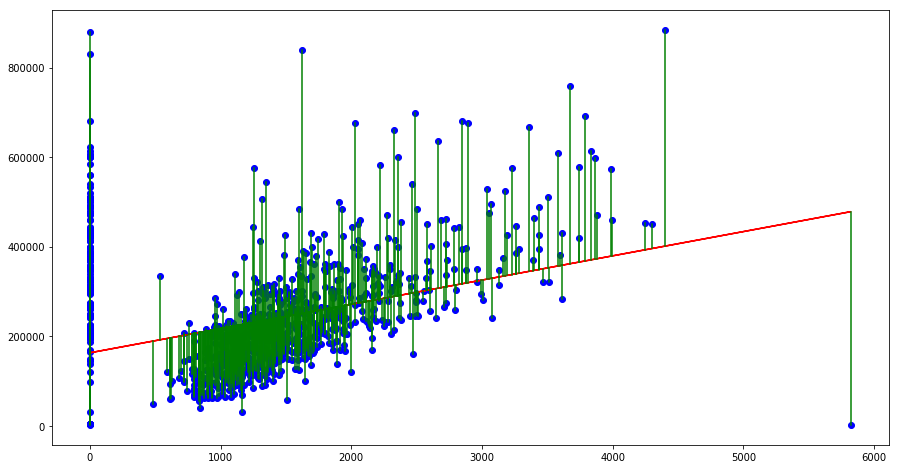

In [55]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [61]:
# ANSWER
x = 1204


In [62]:
beta_0

162930.16140699777

In [63]:
beta_1

54.158639688530755

In [64]:
Ypred = beta_1 * x + beta_0
Ypred

228137.1635919888

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
X = data[['sq__ft']]
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


In [67]:
linreg.score(X, Y)

0.11148717682951437

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [71]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[52.76019739] 165728.65866375068


In [72]:
linreg.score(X_test, y_test)

0.1430256119123644

In [73]:
Ypred = linreg.predict([[1000]])# predicting for 1000sqft
print('Predicted house price: ', Ypred[0])

Predicted house price:  218488.8560513317
